# Prediction of game popularity using texual data

In [19]:
import pandas as pd
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
!pip install graphviz

In [20]:
def mergeSteamAndSteamDescription(steamDescriptions, descriptions, steam):
    descriptions["steam_appid"]=steamDescriptions["steam_appid"]
    df=pd.merge(steam,descriptions,left_on="appid", right_on="steam_appid")
    print(df.columns)
    res=df.iloc[:,20:-1]
#     res["Popularity"]=df;;["Popularity"]
    #y=X.iloc[:,-1]
    return res

In [4]:
steam=pd.read_csv("project_preprocess.csv")
originalSteam=pd.read_csv("steam.csv")
steamDescriptions=pd.read_csv("steam_description_data.csv")
TFIDFDescriptions=pd.read_csv("TFIDFDescriptions.csv")
steam.head()
TFIDFDescriptions.head()

,action,adventure,available,based,battle,best,build,challenge,challenging,character,...,try,unique,unlock,use,using,various,want,way,weapons,world
0,0.225381,0.0,0.0,0.224651,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.163636
1,0.204416,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.458153,...,0.0,0.346357,0.0,0.0,0.0,0.0,0.0,0.0,0.210029,0.000000
2,0.000000,0.0,0.0,0.369677,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.314201,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.395474,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [5]:
res=mergeSteamAndSteamDescription(steamDescriptions,TFIDFDescriptions , originalSteam)
res["popularity"] = steam["popularity"]
res.head()

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres',
       ...
       'unique', 'unlock', 'use', 'using', 'various', 'want', 'way', 'weapons',
       'world', 'steam_appid'],
      dtype='object', length=108)


,available,based,battle,best,build,challenge,challenging,character,characters,choose,...,unique,unlock,use,using,various,want,way,weapons,world,popularity
0,0.0,0.224651,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.163636,Main Stream
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.458153,0.0,0.0,...,0.346357,0.0,0.0,0.0,0.0,0.0,0.0,0.210029,0.000000,Main Stream
2,0.0,0.369677,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.314201,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,Main Stream
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,Main Stream
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,Main Stream


## Train Test Split

In [6]:
(df_train, df_test) = train_test_split(res, random_state=0)
X_train = df_train.drop("popularity", axis=1)
X_test = df_test.drop("popularity", axis=1)
y_train = df_train.popularity
y_test = df_test.popularity

## Decision Tree

In [7]:
grid = {'max_depth': np.arange(1,15)}

In [8]:
dt = DecisionTreeClassifier()
dtCV = GridSearchCV(dt, param_grid=grid, return_train_score=True, n_jobs=-1)
dtCV.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             return_train_score=True)

In [9]:
dtCV.best_score_

0.6869397522348439

In [14]:
tree=dtCV.best_estimator_
tree.score(X_test, y_test)

0.6897621509824199

In [10]:
dtCV.best_params_

{'max_depth': 3}

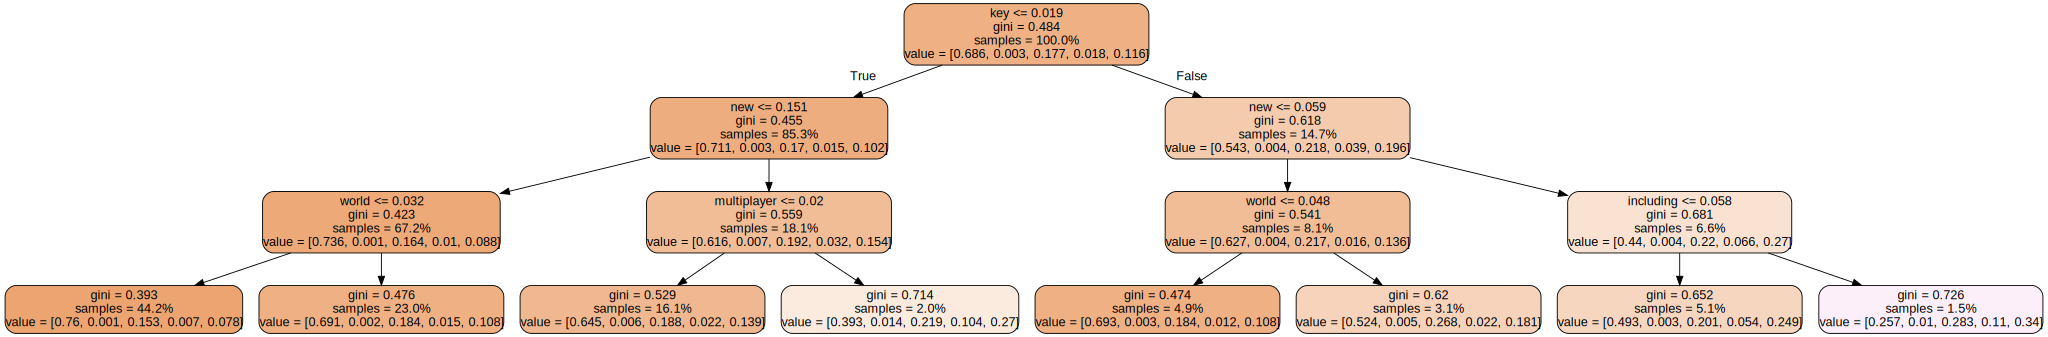

In [24]:

dot_data = export_graphviz(tree,
                           out_file=None,
                           feature_names=X_train.columns,
                           proportion=True,
                           impurity=True,
                           filled=True,
                           rounded=True)
graph=graphviz.Source(dot_data)
graph.render('WordTree')
graph

## Random Forest

In [30]:
grid = {'n_estimators':[10,100,200],'max_depth':np.arange(1,30)}
rf = RandomForestClassifier(n_jobs=-1)
rfCV = GridSearchCV(rf,param_grid=grid,n_jobs=-1)
rfCV.fit(X_train,y_train)
print('Random Forests:')
print('optimal parameters:',rfCV.best_params_)
print('optimal validation R2 =',rfCV.best_score_.round(3))

Random Forests:
optimal parameters: {'max_depth': 29, 'n_estimators': 200}
optimal validation R2 = 0.689


In [31]:
rf=rfCV.best_estimator_
rf.score(X_test, y_test)

0.6900576156005318

# Gradient Boosting

In [37]:
# grid = {'learning_rate':[0.01,0.001],'n_estimators':[100,200]}
# gbt = GradientBoostingClassifier()
# gbtCV = GridSearchCV(gbt,param_grid=grid,n_jobs=-1)
# gbtCV.fit(X_train,y_train)
# print('Gradient Boosting Trees:')
# print('optimal parameters:',gbtCV.best_params_)
# print('optimal validation R2 =',gbtCV.best_score_.round(3))

In [38]:
gbt=GradientBoostingClassifier(learning_rate=0.01, n_estimators=100)
gbt.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01)